In [1]:
import sys
import os
sys.path.append(os.path.join(os.getcwd(), "..", "..", "..", "..", ".."))
sys.path.append(os.path.join(os.getcwd(), "..", "..", "..", ".."))
sys.path.append(os.path.join(os.getcwd(), "..", "..", ".."))
sys.path.append(os.path.join(os.getcwd(), "..", ".."))
sys.path

['/home/blessyantony/miniconda3/envs/zoonosis/lib/python311.zip',
 '/home/blessyantony/miniconda3/envs/zoonosis/lib/python3.11',
 '/home/blessyantony/miniconda3/envs/zoonosis/lib/python3.11/lib-dynload',
 '',
 '/home/blessyantony/miniconda3/envs/zoonosis/lib/python3.11/site-packages',
 '/home/blessyantony/dev/git/zoonosis/src/jupyter_notebooks/results-analysis/coronaviridae/../../../../..',
 '/home/blessyantony/dev/git/zoonosis/src/jupyter_notebooks/results-analysis/coronaviridae/../../../..',
 '/home/blessyantony/dev/git/zoonosis/src/jupyter_notebooks/results-analysis/coronaviridae/../../..',
 '/home/blessyantony/dev/git/zoonosis/src/jupyter_notebooks/results-analysis/coronaviridae/../..']

In [2]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

from src.utils import utils, evaluation_utils, visualization_utils
from sklearn.metrics import auc, precision_recall_curve
from statistics import mean
from datetime import datetime

In [3]:
# file_paths = {
#     "msl128vs30_s64_UA": os.path.join(os.getcwd(), "..","..", "..", "..", "output/raw/coronaviridae_s_prot_variants/20240824/sars-cov-2/uniprot/cov-S-multi-transfer_learning_mlm_hybrid_attn_fnn_2l_lr1e-4/msl128vs30_s64/tl_tf_multi_sarscov2_variants_s.csv"),
#     "msl128vs30cls_s64_UA": os.path.join(os.getcwd(), "..","..", "..", "..", "output/raw/coronaviridae_s_prot_variants/20240825/sars-cov-2/uniprot/cov-S-multi-transfer_learning_mlm_hybrid_attn_fnn_2l_lr1e-4/msl128vs30cls_s64/tl_tf_multi_sarscov2_variants_s.csv"),
#     "msl256vs30_s64_UA": os.path.join(os.getcwd(), "..","..", "..", "..", "output/raw/coronaviridae_s_prot_variants/20240808/sars-cov-2/uniprot/cov-S-multi-transfer_learning_mlm_hybrid_attn_fnn_2l_lr1e-4/msl256vs30_s64/tl_tf_multi_sarscov2_variants_s.csv"),
#     "msl256vs30cls_s64_UA": os.path.join(os.getcwd(), "..","..", "..", "..", "output/raw/coronaviridae_s_prot_variants/20240808/sars-cov-2/uniprot/cov-S-multi-transfer_learning_mlm_hybrid_attn_fnn_2l_lr1e-4/msl256vs30cls_s64/tl_tf_multi_sarscov2_variants_s.csv")
# }
id_col = "accession_id"
file_paths = {
    #"msl128vs30_ae_bn_s64_UA": os.path.join(os.getcwd(), "..","..", "..", "..", "output/raw/coronaviridae_s_prot_variants/20240829/sars-cov-2/uniprot/cov-S-multi-transfer_learning_mlm_hybrid_attn_fnn_2l_lr1e-4/msl128ae_bn_vs30_s64/tl_tf_multi_sarscov2_variants_s.csv"),
    #"msl128vs30cls_ae_bn_s64_UA": os.path.join(os.getcwd(), "..","..", "..", "..", "output/raw/coronaviridae_s_prot_variants/20240829/sars-cov-2/uniprot/cov-S-multi-transfer_learning_mlm_hybrid_attn_fnn_2l_lr1e-4/msl128ae_bn_vs30cls_s64/tl_tf_multi_sarscov2_variants_s.csv"),
    #"ProtienBert": os.path.join(os.getcwd(), "..","..", "..", "..", "output/raw/coronaviridae_s_prot_uniprot_embl_vertebrates_t0.01_c8/20240902/host_multi/proteinbert/uniprot_cov_s_prot_embl_hosts/sarscov2_variants_s_prediction_results_20240902_224534.csv"),
    "ProstT5": os.path.join(os.getcwd(), "..","..", "..", "..", "output/raw/sarscov2_s_prot_variants/20250123/uniref90/external/prostt5_lr1e-4.csv"),
    #"ESM2-35M": os.path.join(os.getcwd(), "..","..", "..", "..", "output/raw/sarscov2_s_prot_variants/20250123/uniref90/external/esm2_t12_35M_UR50D_lr1e-4.csv"),
    #"ESM2-650M": os.path.join(os.getcwd(), "..","..", "..", "..", "output/raw/sarscov2_s_prot_variants/20250123/uniref90/external/esm2_t33_650M_UR50D_lr1e-4.csv"),
    "ESM2-3B": os.path.join(os.getcwd(), "..","..", "..", "..", "output/raw/sarscov2_s_prot_variants/20250123/uniref90/external/esm2_t36_3B_UR50D_lr1e-4.csv"),
    # "ESM3": os.path.join(os.getcwd(), "..","..", "..", "..", "output/raw/coronaviridae_s_prot_variants/20241205/sars-cov-2/unirprot/esm3/esm3_lr1e-4_tl_tf_multi_sarscov2_variants_s.csv"),
    #"ProtienBert-2048": os.path.join(os.getcwd(), "..","..", "..", "..", "output/raw/coronaviridae_s_prot_uniprot_embl_vertebrates_t0.01_c8/20240902/host_multi/proteinbert/uniprot_cov_s_prot_embl_hosts/sarscov2_variants_s_prediction_results_20240903_132845.csv"),
    #"VirProBert-msl1366": os.path.join(os.getcwd(), "..","..", "..", "..", "output/raw/coronaviridae_s_prot_variants/20240903/sars-cov-2/uniprot/cov-S-multi-transfer_learning_mlm_msl1366/tl_tf_multi_sarscov2_variants_s.csv"),
    #"Hybd-sl256s64_UA": os.path.join(os.getcwd(), "..","..", "..", "..", "output/raw/coronaviridae_s_prot_perturbation/20240829/sars-cov-2/uniprot/cov-S-multi-transfer_learning_mlm_hybrid_attn_fnn_2l_lr1e-4/msl256ae_bn_vs30_s64/tl_tf_multi_sarscov2_variants_s.csv"),
    #"Hybd-sl256s64_CLS_UA": os.path.join(os.getcwd(), "..","..", "..", "..", "output/raw/coronaviridae_s_prot_variants/20240829/sars-cov-2/uniprot/cov-S-multi-transfer_learning_mlm_hybrid_attn_fnn_2l_lr1e-4/msl256ae_bn_vs30cls_s64/tl_tf_multi_sarscov2_variants_s.csv"),
    "VirProBERT": os.path.join(os.getcwd(), "..","..", "..", "..", "output/raw/sarscov2_s_prot_variants/20250123/uniref90/cov-S-multi-transfer_learning_mlm_hybrid_attn_fnn_2l_lr1e-4/msl256ae_bn_vs30cls_s64.csv")
}

In [4]:
dfs = []
for k, v in file_paths.items():
    df = pd.read_csv(v)
    df["model"] = k
    index_seq_pred = df[df[id_col] == "YP_009724390.1"]["Human"].values[0]
    df["Human_pred_diff"] = df["Human"] - index_seq_pred
    dfs.append(df)
df = pd.concat(dfs)
df

,accession_id,Cat,Chicken,Chinese rufous horseshoe bat,Ferret,Gray wolf,Horshoe bat,Human,Pig,y_true,pangolin_lineage,geo_location,seq_length,model,Human_pred_diff
0,UJP73808.1,0.008388,0.020135,0.886521,0.018504,0.005834,0.013771,0.038615,0.008232,Human,B.1.1.529,USA: Arkansas,1268,ProstT5,0.037373
1,QTE17897.1,0.001691,0.048565,0.919996,0.006400,0.001684,0.013567,0.001437,0.006660,Human,P.2,USA: Texas,1273,ProstT5,0.000195
2,UDJ28498.1,0.002014,0.052340,0.917383,0.005797,0.001957,0.012896,0.001807,0.005805,Human,B.1.617.2,USA: Idaho,1271,ProstT5,0.000566
3,QTC59839.1,0.001754,0.050290,0.916645,0.007145,0.001682,0.014982,0.001352,0.006150,Human,P.2,USA: Arizona,1273,ProstT5,0.000110
4,UCS68126.1,0.026694,0.000200,0.004358,0.030332,0.026901,0.022909,0.883784,0.004824,Human,B.1.617.1,Kenya,1273,ProstT5,0.882542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1521,QVL01758.1,0.040101,0.000005,0.614859,0.024371,0.003751,0.032906,0.273032,0.010976,Human,B.1.1.7,USA: Michigan,1270,VirProBERT,-0.468530
1522,QVG32451.1,0.024636,0.000005,0.142835,0.015277,0.003411,0.029747,0.768989,0.015099,Human,B.1.617.1,USA: Illinois,1273,VirProBERT,0.027428
1523,UIT75201.1,0.008459,0.000001,0.070926,0.010776,0.001566,0.009238,0.889716,0.009317,Human,B.1.427,USA,1273,VirProBERT,0.148155
1524,UGW14958.1,0.021574,0.000008,0.166947,0.015973,0.003626,0.032665,0.739008,0.020199,Human,B.1.427,USA,1273,VirProBERT,-0.002553


In [5]:
order = list(df["pangolin_lineage"].sort_values().unique())
order.remove("B")
order = ["B"] + order
order

['B',
 'B.1.1.529',
 'B.1.1.7',
 'B.1.351',
 'B.1.427',
 'B.1.429',
 'B.1.525',
 'B.1.526',
 'B.1.617.1',
 'B.1.617.2',
 'B.1.621',
 'BA.1',
 'C.37',
 'P.1',
 'P.2',
 'P.3']

In [6]:
models = list(df["model"].unique())
models

['ProstT5', 'ESM2-3B', 'VirProBERT']

In [7]:
who_designation_df = pd.read_csv(os.path.join(os.getcwd(), "..","..", "..", "..", "input/data/coronaviridae/20240313/sarscov2/sarscov2_who_designated_voc.csv"))
who_designation_df

,pango_lineage,who_variant,designation,first_designation_date,location
0,B,Wuhan-Hu-1,Index,12/01/2019,China
1,B.1.1.7,Alpha,VOC,12/08/2020,United Kingdom
2,B.1.351,Beta,VOC,12/18/2020,South Africa
3,P.1,Gamma,VOC,1/11/2021,Brazil
4,B.1.617.2,Delta,VOC,5/11/2021,India
5,B.1.427,Epsilon,VOI,3/5/2021,USA
6,B.1.429,Epsilon,VOI,3/5/2021,USA
7,P.2,Zeta,VOI,3/17/2021,Brazil
8,B.1.525,Eta,VOI,3/17/2021,Nigeria
9,P.3,Theta,VOI,3/24/2021,Philippines


In [8]:
who_designation_df["pango_who_annotation"] = who_designation_df["pango_lineage"] + " (" + who_designation_df["who_variant"] + ")" 
variant_order = who_designation_df["pango_who_annotation"].unique()
variant_order

array(['B (Wuhan-Hu-1)', 'B.1.1.7 (Alpha)', 'B.1.351 (Beta)',
       'P.1 (Gamma)', 'B.1.617.2 (Delta)', 'B.1.427 (Epsilon)',
       'B.1.429 (Epsilon)', 'P.2 (Zeta)', 'B.1.525 (Eta)', 'P.3 (Theta)',
       'B.1.526 (Iota)', 'B.1.617.1 (Kappa)', 'C.37 (Lambda)',
       'B.1.621 (Mu)', 'B.1.1.529 (Omicron)', 'BA.1 (Omicron)'],
      dtype=object)

In [9]:
who_designation_df.rename(columns={"pango_lineage": "pangolin_lineage"}, inplace=True)

In [10]:
df = pd.merge(df, who_designation_df, how="inner", on="pangolin_lineage")

In [11]:
df

,accession_id,Cat,Chicken,Chinese rufous horseshoe bat,Ferret,Gray wolf,Horshoe bat,Human,Pig,y_true,pangolin_lineage,geo_location,seq_length,model,Human_pred_diff,who_variant,designation,first_designation_date,location,pango_who_annotation
0,UJP73808.1,0.008388,0.020135,0.886521,0.018504,0.005834,0.013771,0.038615,0.008232,Human,B.1.1.529,USA: Arkansas,1268,ProstT5,0.037373,Omicron,VOC,11/26/2021,South Africa,B.1.1.529 (Omicron)
1,QTE17897.1,0.001691,0.048565,0.919996,0.006400,0.001684,0.013567,0.001437,0.006660,Human,P.2,USA: Texas,1273,ProstT5,0.000195,Zeta,VOI,3/17/2021,Brazil,P.2 (Zeta)
2,UDJ28498.1,0.002014,0.052340,0.917383,0.005797,0.001957,0.012896,0.001807,0.005805,Human,B.1.617.2,USA: Idaho,1271,ProstT5,0.000566,Delta,VOC,5/11/2021,India,B.1.617.2 (Delta)
3,QTC59839.1,0.001754,0.050290,0.916645,0.007145,0.001682,0.014982,0.001352,0.006150,Human,P.2,USA: Arizona,1273,ProstT5,0.000110,Zeta,VOI,3/17/2021,Brazil,P.2 (Zeta)
4,UCS68126.1,0.026694,0.000200,0.004358,0.030332,0.026901,0.022909,0.883784,0.004824,Human,B.1.617.1,Kenya,1273,ProstT5,0.882542,Kappa,VOI,4/4/2021,India,B.1.617.1 (Kappa)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4573,QVL01758.1,0.040101,0.000005,0.614859,0.024371,0.003751,0.032906,0.273032,0.010976,Human,B.1.1.7,USA: Michigan,1270,VirProBERT,-0.468530,Alpha,VOC,12/08/2020,United Kingdom,B.1.1.7 (Alpha)
4574,QVG32451.1,0.024636,0.000005,0.142835,0.015277,0.003411,0.029747,0.768989,0.015099,Human,B.1.617.1,USA: Illinois,1273,VirProBERT,0.027428,Kappa,VOI,4/4/2021,India,B.1.617.1 (Kappa)
4575,UIT75201.1,0.008459,0.000001,0.070926,0.010776,0.001566,0.009238,0.889716,0.009317,Human,B.1.427,USA,1273,VirProBERT,0.148155,Epsilon,VOI,3/5/2021,USA,B.1.427 (Epsilon)
4576,UGW14958.1,0.021574,0.000008,0.166947,0.015973,0.003626,0.032665,0.739008,0.020199,Human,B.1.427,USA,1273,VirProBERT,-0.002553,Epsilon,VOI,3/5/2021,USA,B.1.427 (Epsilon)


In [12]:
def get_annotation(x):
    mean_val = np.mean(x)
    std_val = np.std(x)
    return "{:.2f}".format(mean_val) + "\n" + u"\u00B1" + "{:.2f}".format(std_val)
    
def get_annotation_df(heatmap_df, model_df):
    annot_df = pd.DataFrame(0, index=heatmap_df.index, columns=heatmap_df.columns)
    annot_idx = heatmap_df.idxmax(axis=1).reset_index()
    mean_std_df = model_df.groupby("pango_who_annotation").agg(lambda x: get_annotation(x))
    for item in annot_idx.values:
        annot_df.loc[item[0], item[1]] = mean_std_df.loc[item[0], item[1]]
        annot_df.loc[item[0], "Human"] = mean_std_df.loc[item[0], "Human"]
    annot_df = annot_df.astype(str)
    annot_df[annot_df == "0"] = ""
    return annot_df

/tmp/ipykernel_3385370/3754021456.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.53
±0.37' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  annot_df.loc[item[0], item[1]] = mean_std_df.loc[item[0], item[1]]
/tmp/ipykernel_3385370/3754021456.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.19
±0.23' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  annot_df.loc[item[0], "Human"] = mean_std_df.loc[item[0], "Human"]
/tmp/ipykernel_3385370/3754021456.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.76
±0.28' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  annot_df.loc[item[0], item[1]] = mean_std_df.loc[item

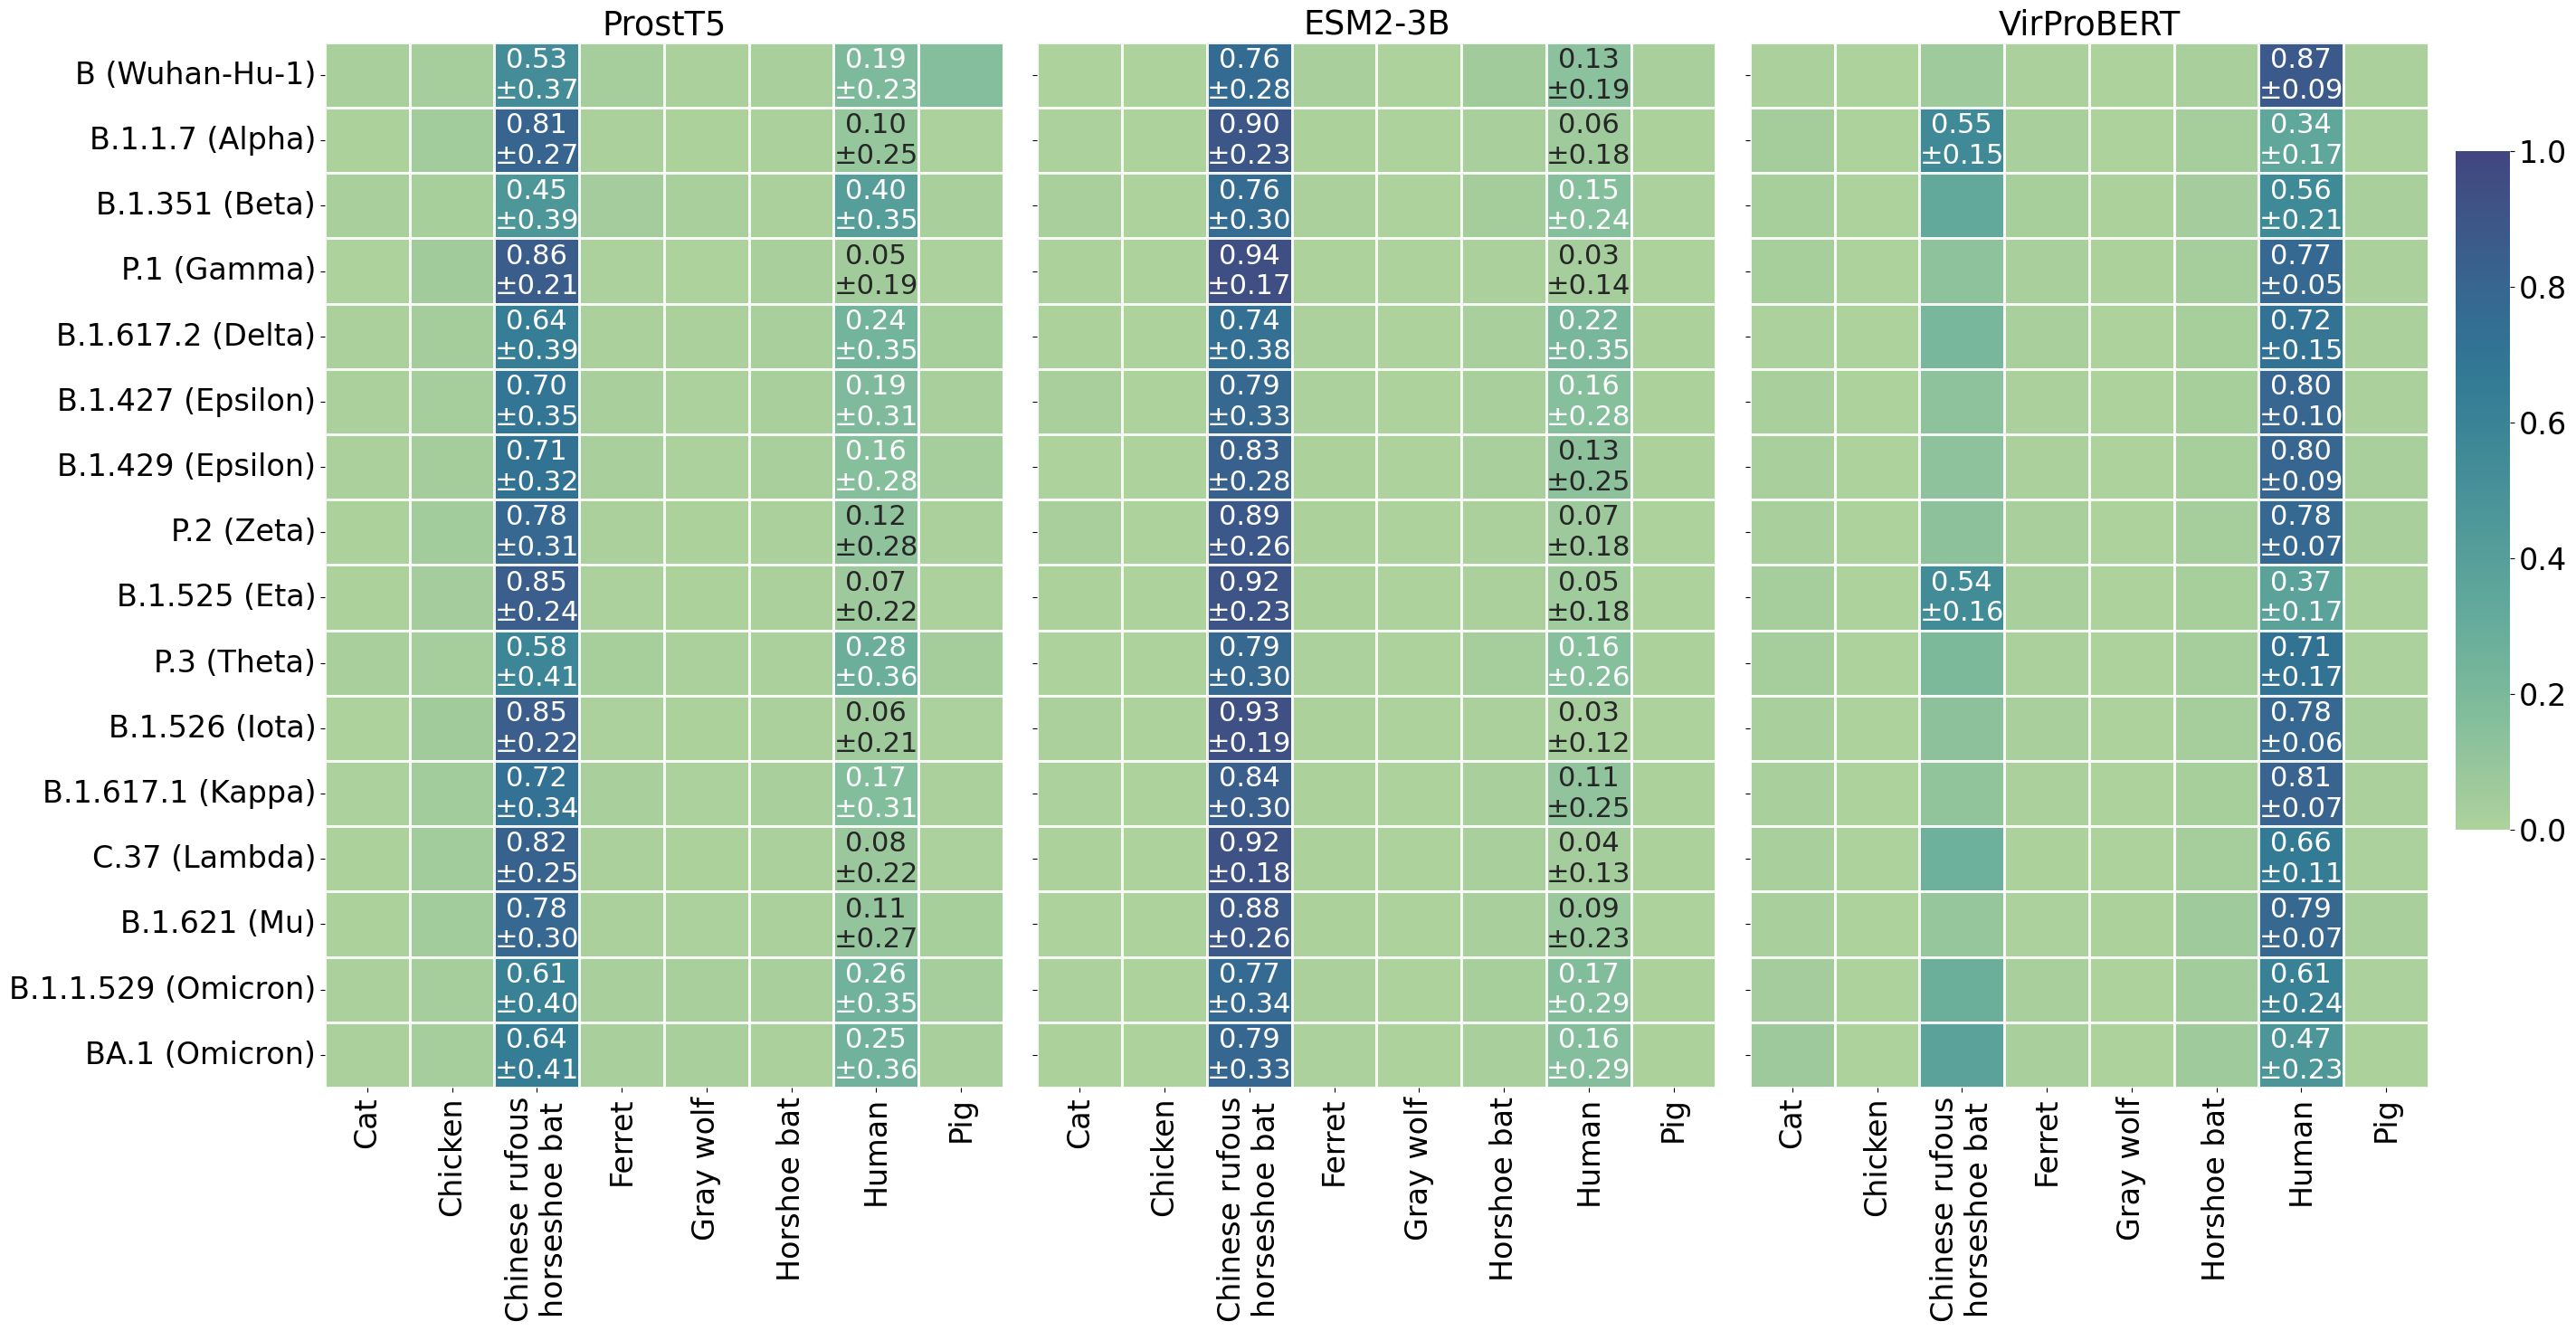

In [13]:
plt.rcParams['xtick.labelsize'] = 24
plt.rcParams['ytick.labelsize'] = 24
plt.rcParams.update({'font.size': 22})
fig, axs = plt.subplots(1, 3, figsize=(30, 15), sharex=False, sharey=True)

cbar_ax = fig.add_axes([.91, .3, .02, .5])
for i, model in enumerate(models):
    model_df = df[df["model"] == model][["Cat", "Chicken", "Chinese rufous horseshoe bat", "Ferret", "Gray wolf", "Horshoe bat", "Human", "Pig", "pango_who_annotation"]].set_index("pango_who_annotation")
    heatmap_df = model_df.groupby("pango_who_annotation").agg("mean").reindex(variant_order)
    model_df.rename(columns={"Chinese rufous horseshoe bat": "Chinese rufous\nhorseshoe bat"}, inplace=True)
    heatmap_df.rename(columns={"Chinese rufous horseshoe bat": "Chinese rufous\nhorseshoe bat"}, inplace=True)
    sns.heatmap(heatmap_df, ax=axs[i], linewidth=2,
                annot=get_annotation_df(heatmap_df, model_df), fmt="",
                vmin=0, vmax=1,
                cbar=i == 0, 
                cbar_ax=None if i != 0 else cbar_ax,
                cmap="crest", alpha=.9)
    axs[i].set_title(model)
    axs[i].set(xlabel="", ylabel="")
plt.subplots_adjust(wspace=0.05)
plt.savefig(os.path.join(os.getcwd(), "..", "..", "..", "..", f"output/visualization/temp_new/sarscov2_variants_uniref90.pdf"), bbox_inches="tight")
plt.show()

In [14]:
df

,accession_id,Cat,Chicken,Chinese rufous horseshoe bat,Ferret,Gray wolf,Horshoe bat,Human,Pig,y_true,pangolin_lineage,geo_location,seq_length,model,Human_pred_diff,who_variant,designation,first_designation_date,location,pango_who_annotation
0,UJP73808.1,0.008388,0.020135,0.886521,0.018504,0.005834,0.013771,0.038615,0.008232,Human,B.1.1.529,USA: Arkansas,1268,ProstT5,0.037373,Omicron,VOC,11/26/2021,South Africa,B.1.1.529 (Omicron)
1,QTE17897.1,0.001691,0.048565,0.919996,0.006400,0.001684,0.013567,0.001437,0.006660,Human,P.2,USA: Texas,1273,ProstT5,0.000195,Zeta,VOI,3/17/2021,Brazil,P.2 (Zeta)
2,UDJ28498.1,0.002014,0.052340,0.917383,0.005797,0.001957,0.012896,0.001807,0.005805,Human,B.1.617.2,USA: Idaho,1271,ProstT5,0.000566,Delta,VOC,5/11/2021,India,B.1.617.2 (Delta)
3,QTC59839.1,0.001754,0.050290,0.916645,0.007145,0.001682,0.014982,0.001352,0.006150,Human,P.2,USA: Arizona,1273,ProstT5,0.000110,Zeta,VOI,3/17/2021,Brazil,P.2 (Zeta)
4,UCS68126.1,0.026694,0.000200,0.004358,0.030332,0.026901,0.022909,0.883784,0.004824,Human,B.1.617.1,Kenya,1273,ProstT5,0.882542,Kappa,VOI,4/4/2021,India,B.1.617.1 (Kappa)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4573,QVL01758.1,0.040101,0.000005,0.614859,0.024371,0.003751,0.032906,0.273032,0.010976,Human,B.1.1.7,USA: Michigan,1270,VirProBERT,-0.468530,Alpha,VOC,12/08/2020,United Kingdom,B.1.1.7 (Alpha)
4574,QVG32451.1,0.024636,0.000005,0.142835,0.015277,0.003411,0.029747,0.768989,0.015099,Human,B.1.617.1,USA: Illinois,1273,VirProBERT,0.027428,Kappa,VOI,4/4/2021,India,B.1.617.1 (Kappa)
4575,UIT75201.1,0.008459,0.000001,0.070926,0.010776,0.001566,0.009238,0.889716,0.009317,Human,B.1.427,USA,1273,VirProBERT,0.148155,Epsilon,VOI,3/5/2021,USA,B.1.427 (Epsilon)
4576,UGW14958.1,0.021574,0.000008,0.166947,0.015973,0.003626,0.032665,0.739008,0.020199,Human,B.1.427,USA,1273,VirProBERT,-0.002553,Epsilon,VOI,3/5/2021,USA,B.1.427 (Epsilon)


In [15]:
sub_df = df[["pango_who_annotation", "model", "Chinese rufous horseshoe bat", "Human"]]
sub_df = sub_df.set_index(["pango_who_annotation", "model"]).stack().reset_index().rename(columns={"level_2": "class", 0: "probability"})
sub_df

,pango_who_annotation,model,class,probability
0,B.1.1.529 (Omicron),ProstT5,Chinese rufous horseshoe bat,0.886521
1,B.1.1.529 (Omicron),ProstT5,Human,0.038615
2,P.2 (Zeta),ProstT5,Chinese rufous horseshoe bat,0.919996
3,P.2 (Zeta),ProstT5,Human,0.001437
4,B.1.617.2 (Delta),ProstT5,Chinese rufous horseshoe bat,0.917383
...,...,...,...,...
9151,B.1.427 (Epsilon),VirProBERT,Human,0.889716
9152,B.1.427 (Epsilon),VirProBERT,Chinese rufous horseshoe bat,0.166947
9153,B.1.427 (Epsilon),VirProBERT,Human,0.739008
9154,B.1.617.2 (Delta),VirProBERT,Chinese rufous horseshoe bat,0.328749


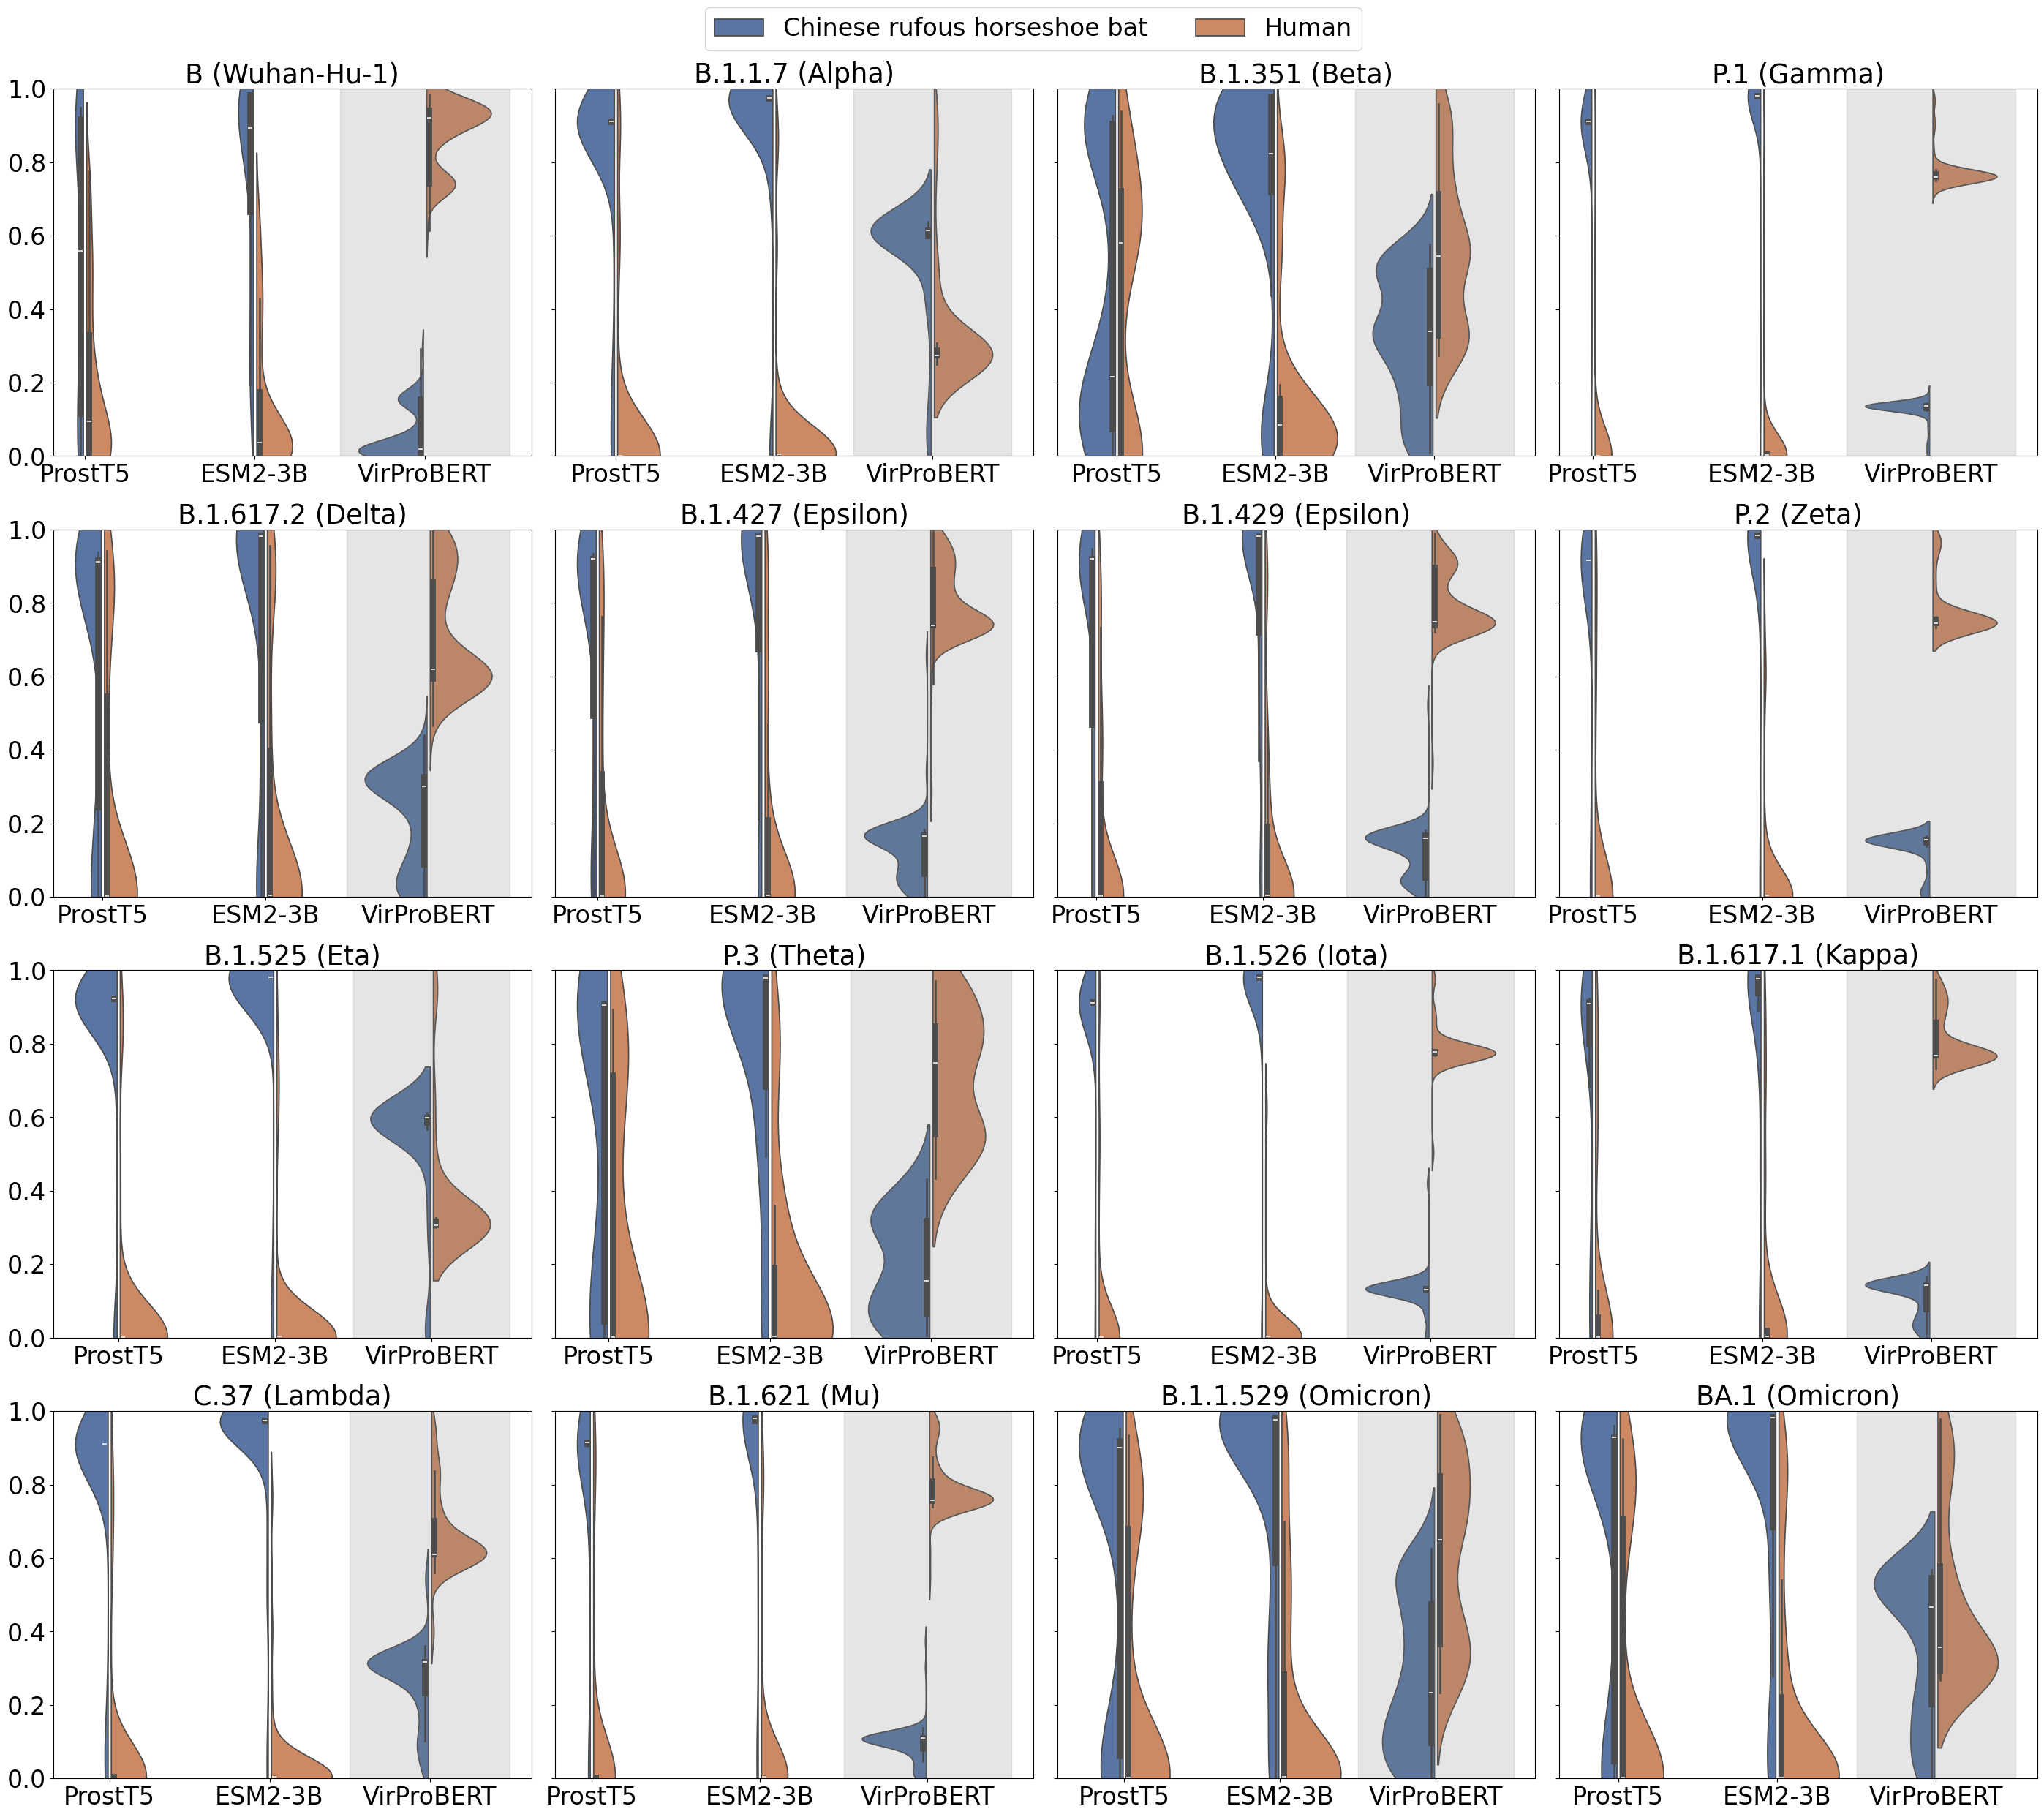

In [45]:
plt.rcParams['xtick.labelsize'] = 24
plt.rcParams['ytick.labelsize'] = 24
plt.rcParams.update({'font.size': 22})
fig, axs = plt.subplots(4, 4, figsize=(35, 30), sharex=False, sharey=True)

i = 0
legend_ax = None
virprobert_index = len(models) - 1
for ax_row in axs:
    for ax in ax_row:
        if i == 1:
            legend_ax = ax
        variant = variant_order[i]
        plot_df = sub_df[sub_df["pango_who_annotation"] == variant][["model", "class", "probability"]]
        sns.violinplot(plot_df, x="model", y="probability", hue="class", ax=ax, 
                       split=True, gap=.05, fill=True, palette="deep",
                      legend=False if i != 1 else True)
        ax.set_title(variant)
        ax.set(xlabel="", ylabel="")
        i += 1
        ax.axvspan(virprobert_index - .5, virprobert_index + .5, color="gray", alpha=0.2)
        ax.set_ylim(0, 1)

for ax in axs.flat:
    ## check if something was plotted 
    if not bool(ax.has_data()):
        fig.delaxes(ax) ## delete if nothing is plotted in the axes obj
        
sns.move_legend(
    legend_ax, "lower center",
    bbox_to_anchor=(1, 1.07), ncol=2, title=None, frameon=True, fontsize=24
)
plt.subplots_adjust(wspace=0.05)
plt.savefig(os.path.join(os.getcwd(), "..", "..", "..", "..", f"output/visualization/temp_new/sarscov2_variants_uniref90_crhb_human_violinplot.pdf"), bbox_inches="tight")
plt.show()